In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [2]:
df=pd.read_csv('movies.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

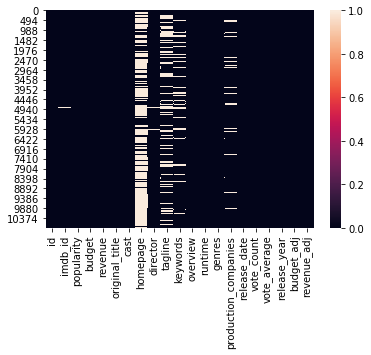

In [5]:
sns.heatmap(df.isnull())

In [6]:
df=df.drop(["homepage","tagline","production_companies","keywords","director","overview","id","imdb_id","release_date"],axis=1)

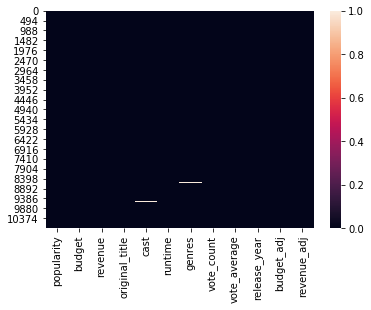

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [9]:
df["budget"].unique.count()


AttributeError: 'function' object has no attribute 'count'

In [74]:
#removing nan object  or  0 
columns = ['budget']
df[columns] = df[columns].replace(0, np.NaN)
df.dropna(subset = columns, inplace = True)


In [75]:
df.shape

(5170, 12)

In [11]:
df=df[df['budget']>60000]


In [12]:
df=df[df["revenue"]>30]

In [13]:
df.shape

(3808, 12)

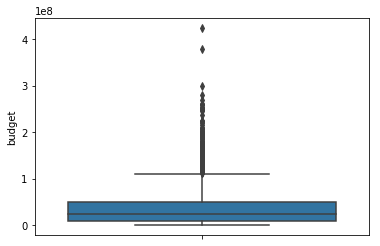

In [14]:
sns.boxplot(y=df['budget'])

In [15]:
# lets go with iqr inter quartile range
Q1 = df.budget.quantile(0.25)
Q3 = df.budget.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

40000000.0


In [16]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print(lower_limit)
print(upper_limit)



-50000000.0
110000000.0


In [17]:
df=df[((df.budget>lower_limit)&(df.budget<upper_limit))]

In [18]:
m=df["release_year"].unique()
m.sort()

In [19]:
print(m)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [20]:
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141.0,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91.0,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09
12,6.118847,15000000.0,3.686941e+07,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,108.0,Drama|Science Fiction,2854,7.6,2015,1.379999e+07,3.391985e+07
13,5.984995,88000000.0,2.436371e+08,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,105.0,Action|Comedy|Science Fiction,1575,5.8,2015,8.095996e+07,2.241460e+08
15,5.898400,44000000.0,1.557601e+08,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,167.0,Crime|Drama|Mystery|Western,2389,7.4,2015,4.047998e+07,1.432992e+08


5.What is the average runtime of movies in year 2006?

In [26]:
c=0
s=0
for (a,b) in zip(df["runtime"],df["release_year"]):
    if b==2006:
        s=s+a
        c=c+1
print("The average runtime of movies in year 2006:",s/c)

The average runtime of movies in year 2006: 107.04430379746836


4.Which are movies with most and least revenue?

In [27]:
# highest revenue
x = df.loc[df['revenue'].idxmax()]


In [28]:
print(x[3])

Minions


In [29]:
#lowest revenue
t = df.loc[df['revenue'].idxmin()]
print(t[3])

Death at a Funeral


1.Which are the movies with the third lowest and third highest budget?

In [30]:

budget1 =  df.iloc[:,[1,3]]




In [31]:
budget1


,budget,original_title
7,108000000.0,The Martian
8,74000000.0,Minions
12,15000000.0,Ex Machina
13,88000000.0,Pixels
15,44000000.0,The Hateful Eight
16,48000000.0,Taken 3
18,95000000.0,Cinderella
21,30000000.0,Southpaw
23,40000000.0,Fifty Shades of Grey
24,28000000.0,The Big Short


In [32]:
budget1=budget1.sort_values(by=['budget'])

In [33]:
print(budget1)

            budget                           original_title
7178       65000.0                            Super Size Me
7166       74050.0  The Heart is Deceitful Above All Things
6945       79000.0                        The Foot Fist Way
9762       85000.0             The Texas Chain Saw Massacre
2191      100000.0                             Halo Legends
6821      100000.0                        Facing the Giants
242       100000.0                              The Gallows
3519      100000.0                            Another Earth
4842      100000.0                                 Stitches
2738      100000.0                                     Tape
5661      100000.0                           Upstream Color
3639      125000.0                     Your Sister's Sister
7057      130000.0                               Open Water
3733      134005.0           Snow Flower and the Secret Fan
7437      160000.0                                     Once
6284      169000.0                      

From the above dataframe the movie with third largest budget is Point Break and the movie with 3rd lowest budget isThe Foot Fist Way

AttributeError: module 'matplotlib' has no attribute 'show'

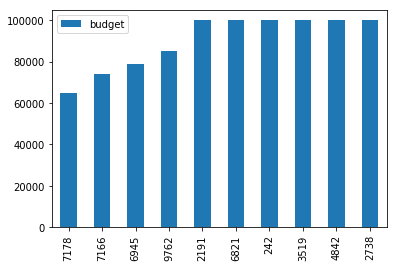

In [41]:
diagram=budget1[:10].plot.bar()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

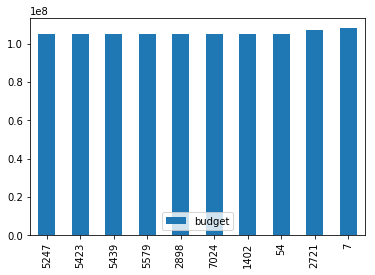

In [42]:
diagram=budget1[-10:].plot.bar()
plt.show()

2.what is the average number of words in movies titles between between year 2000 to 2005

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3545 entries, 7 to 10848
Data columns (total 12 columns):
popularity        3545 non-null float64
budget            3545 non-null float64
revenue           3545 non-null float64
original_title    3545 non-null object
cast              3542 non-null object
runtime           3545 non-null float64
genres            3545 non-null object
vote_count        3545 non-null int64
vote_average      3545 non-null float64
release_year      3545 non-null int64
budget_adj        3545 non-null float64
revenue_adj       3545 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 520.0+ KB


In [53]:
count=0
d=0
for (title,year) in zip(df["original_title"],df["release_year"]):
    if year>=2000 and year<= 2005:
        d=d+len(title.split())
        count=count+1
print(d,count)
print("The average number of words in movies titles between between year 2000 to 2005 is",d/count)


    
        
    

1886 721
The average number of words in movies titles between between year 2000 to 2005 is 2.6158113730929267
